In [3]:
import matplotlib.pyplot as plt
from graph_tool.all import *
import pandas as pd

In [15]:
df = pd.read_csv('SBM_1000.csv')

In [16]:
df.head()
df = df.loc[:, ['space_id', 'data_source']]
df.head()

,space_id,data_source
0,263771,TwitterAds
1,263771,MOZ
2,256380,Shopify
3,18514,Facebook
4,263771,AzureSQL


In [17]:
df.values

array([[263771, 'TwitterAds'],
       [263771, 'MOZ'],
       [256380, 'Shopify'],
       ...,
       [52134, 'CampaignMonitor'],
       [52134, 'FbAds'],
       [27590, 'LinkedIn']], dtype=object)

In [18]:
g = Graph(directed=False)

In [19]:
vmap = g.add_edge_list(df.values, hashed=True)

In [20]:
g

<Graph object, undirected, with 1077 vertices and 11391 edges, at 0x7f8a1b6b9ae0>

In [21]:
vmap

<VertexPropertyMap object with value type 'python::object', for Graph 0x7f8a1b6b9ae0, at 0x7f8a1b6b9720>

In [22]:
state = minimize_blockmodel_dl(g)

In [24]:
state

<BlockState object with 1077 blocks (8 nonempty), degree-corrected, for graph <Graph object, undirected, with 1077 vertices and 11391 edges, at 0x7f8a1b6b9ae0>, at 0x7f8a1b6b8a00>

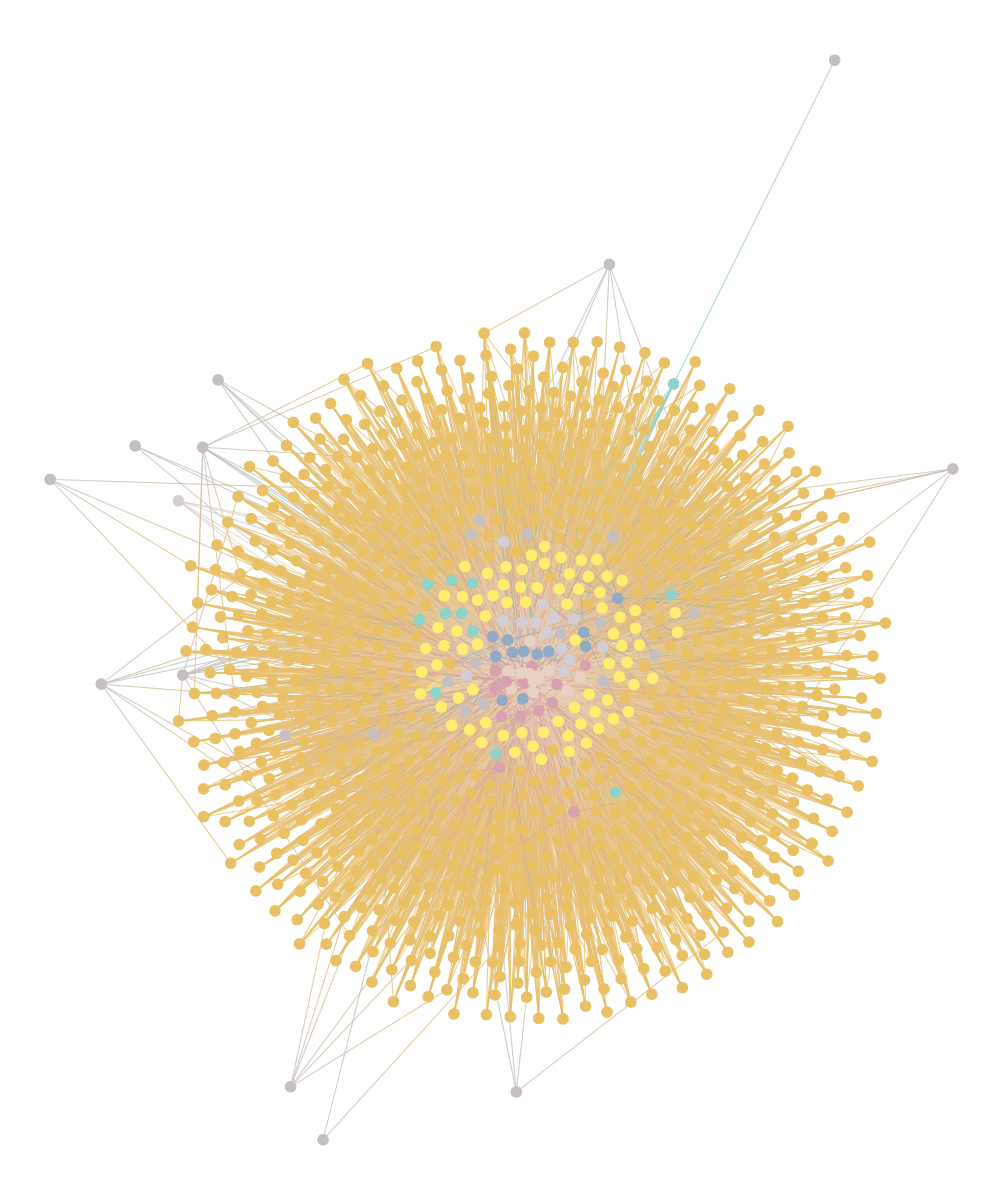

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a1b6b9ae0, at 0x7f8a1b84baf0>

In [28]:
state.draw()

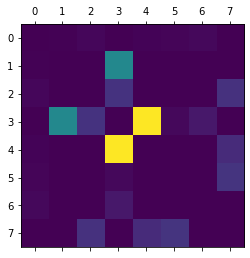

In [29]:
b = contiguous_map(state.get_blocks())
state = state.copy(b=b)

e = state.get_matrix()

B = state.get_nonempty_B()
plt.matshow(e.todense()[:B, :B])

In [30]:
state2 = minimize_nested_blockmodel_dl(g)

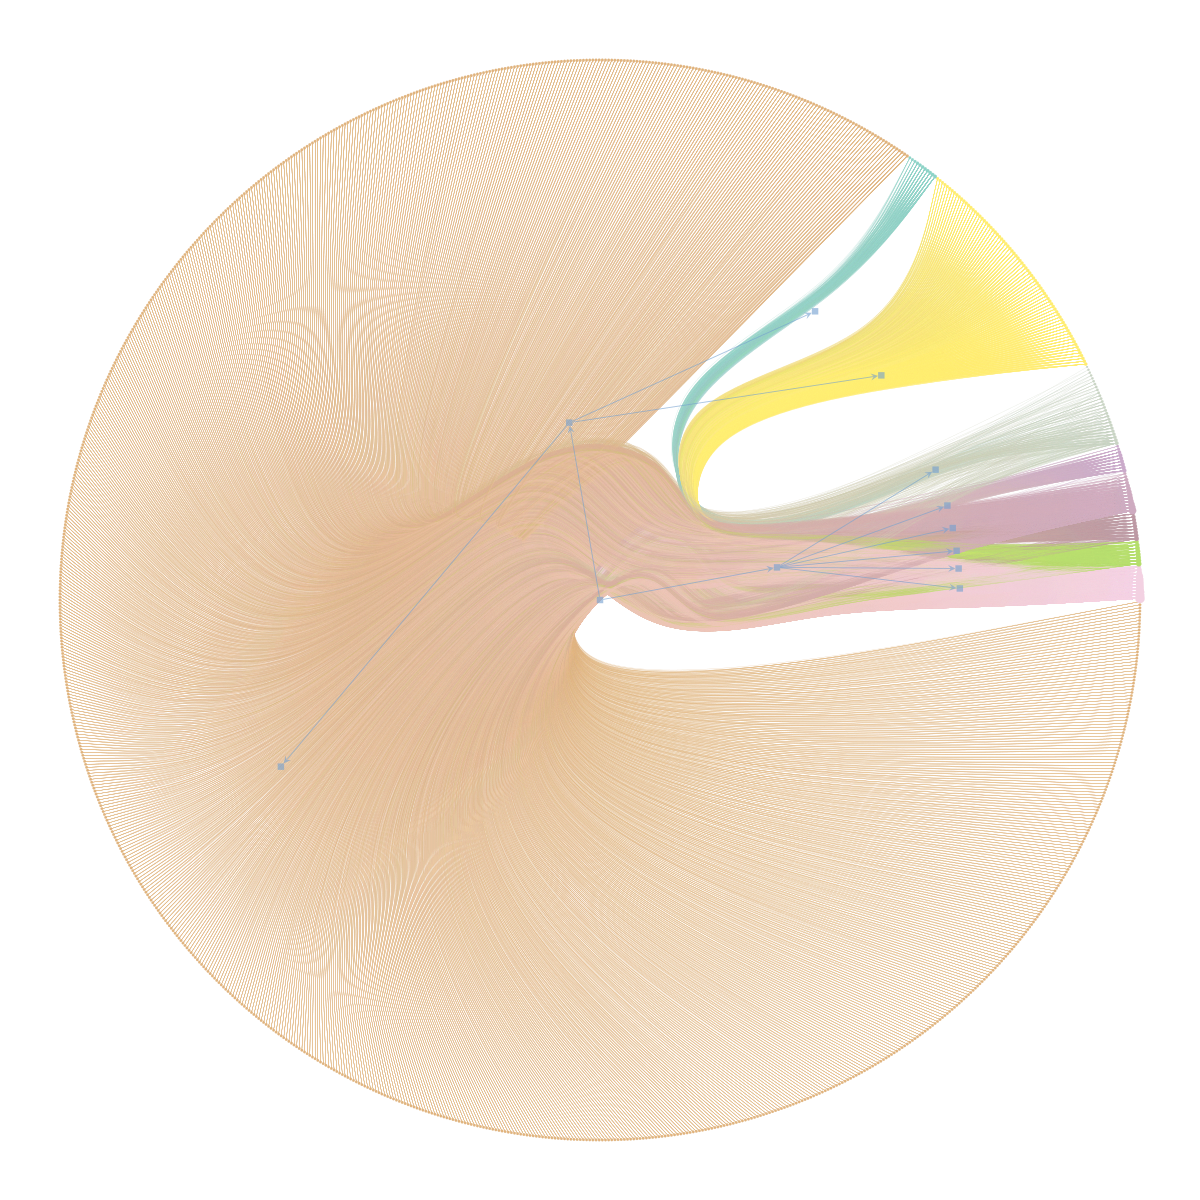

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a1b6b9ae0, at 0x7f8a15b05ed0>,
 <Graph object, directed, with 1089 vertices and 1088 edges, at 0x7f8a15b04880>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a15b04880, at 0x7f8a15b05780>)

In [32]:
state2.draw()